In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/CarPrice_Assignment.csv
/kaggle/input/Data Dictionary - carprices.xlsx


In [2]:
#importing usual libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### <font color=navy>STEP 1: Reading and Understanding the Data</font>

1. Import data using the pandas library
2. Understanding the structure of the data

In [3]:
#importing dataset csv to pandas dataframe

automobile = pd.read_csv("/kaggle/input/CarPrice_Assignment.csv")
automobile.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
#checking number of rows and columns

automobile.shape

(205, 26)

In [5]:
#checking dtypes and null values of columns

automobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [6]:
#checking summary of numeric variables

automobile.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
#checking number of columns of each data type for general EDA

automobile.dtypes.value_counts()

object     10
int64       8
float64     8
dtype: int64

### <font color=navy>Step 2 : Data Cleaning and Exploratory Data Analysis</font>
1. Cleanup carname to consider only company name as the independent variable for model building.
2. Identify null values.
3. Replace neccessary values.
4. Convert dtypes if required.
5. Explore spread of variables and their influence on price

In [8]:
#cleaning Car Name to keep only brand(company) name and remove model names 

automobile['CarName']=automobile['CarName'].apply(lambda x:x.split(' ', 1)[0])
automobile.rename(columns = {'CarName':'companyname'}, inplace = True)
automobile.head()

,car_ID,symboling,companyname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [9]:
#checking unique values in company name column

automobile.companyname.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

Invalid Values

There is some inconsistency in the spellings of company names, which needs to be fixed. We need to do the following replacements:

- maxda -> mazda
- Nissan -> nissan
- porcshce -> porsche 
- toyouta -> toyota
- vokswagen -> volkswagen
- vw -> volkswagen

In [10]:
#counting number of unique company names

automobile.companyname.nunique()

28

**There are 28 unique companies right now**

In [11]:
# Fixing values in company name

automobile.companyname = automobile.companyname.str.lower()

def replace_name(a,b):
    automobile.companyname.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

automobile.companyname.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [12]:
#counting number of unique company names

automobile.companyname.nunique()

22

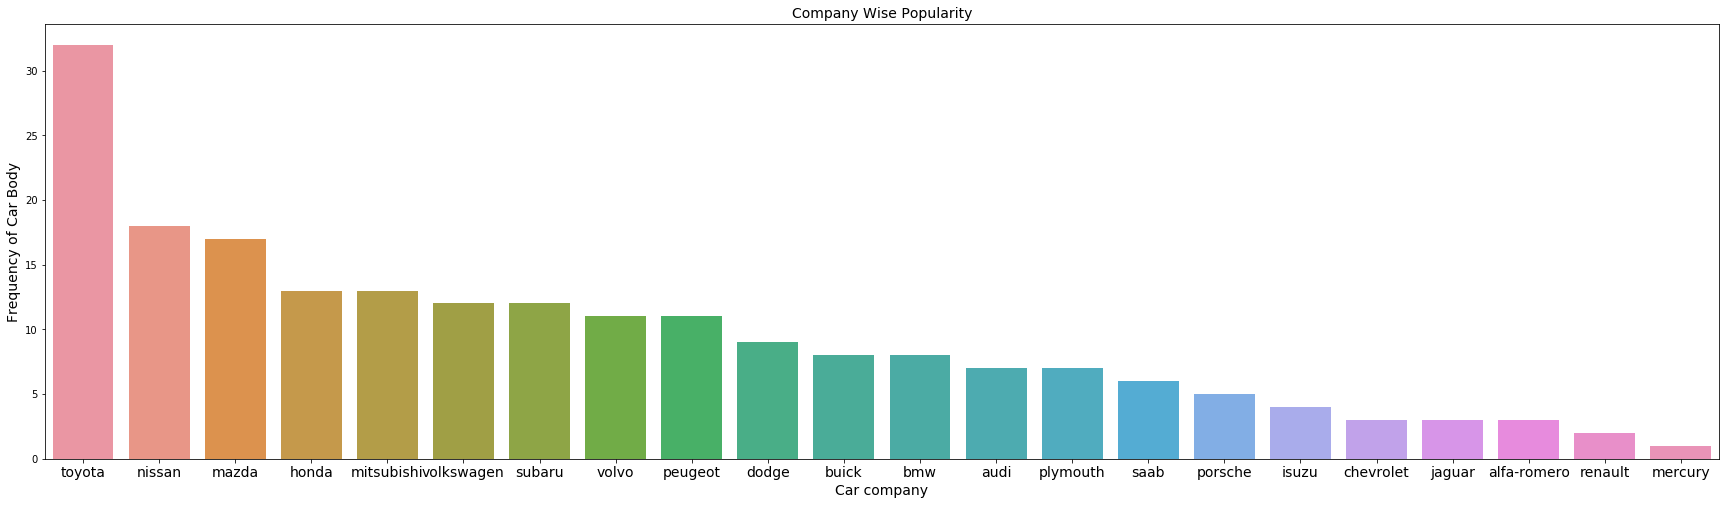

In [13]:
#plotting count of company names

plt.figure(figsize=(30, 8))
plt1=sns.countplot(x=automobile.companyname, data=automobile, order= automobile.companyname.value_counts().index)
plt.title('Company Wise Popularity', size=14)
plt1.set_xlabel('Car company', fontsize=14)
plt1.set_ylabel('Frequency of Car Body', fontsize=14)
plt1.set_xticklabels(plt1.get_xticklabels(),rotation=360, size=14)
plt.show()

**Inferences:**
- Toyota has most number of rows and seems to be the most popular brand/company.
- Mercury had the least number of rows and is the least popular company.

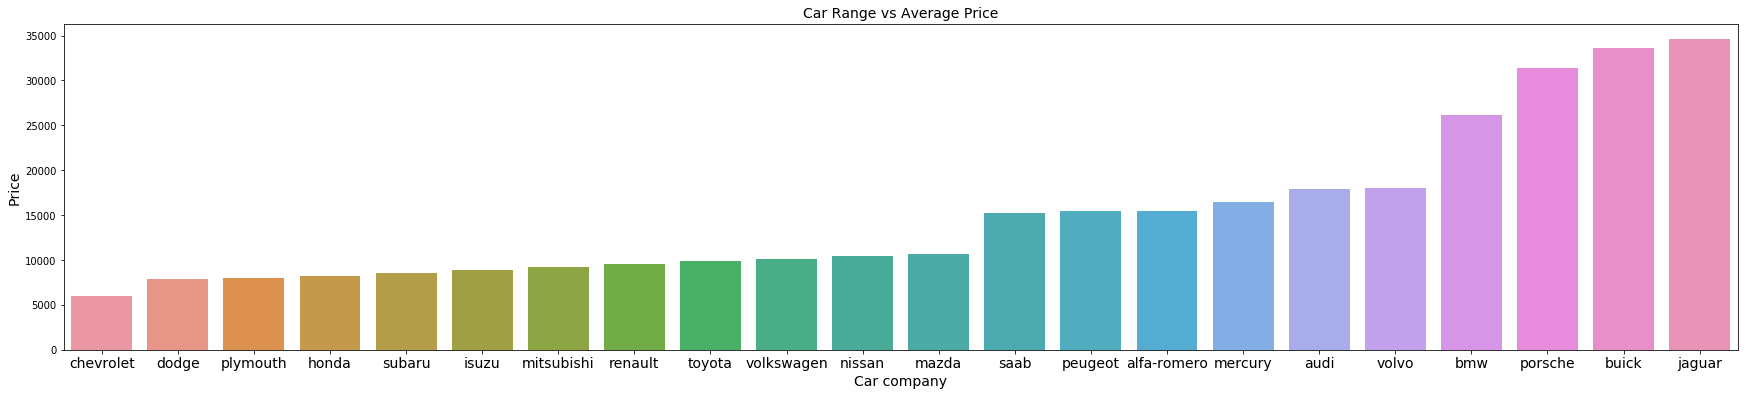

In [14]:
#plotting company wise average price of car

plt.figure(figsize=(30, 6))

df = pd.DataFrame(automobile.groupby(['companyname'])['price'].mean().sort_values())
df=df.reset_index(drop=False)
plt1=sns.barplot(x="companyname", y="price", data=df)
plt1.set_title('Car Range vs Average Price', size=14)
plt1.set_xlabel('Car company', fontsize=14)
plt1.set_ylabel('Price', fontsize=14)
plt1.set_xticklabels(plt1.get_xticklabels(),rotation=360, size=14)
plt.show()

**INFERENCES:**
- Chevrolet has the cheapest average price amongst all companies.
- Jaguar has the highest average price.
- The avg price seems to be dependant on the company name and this is an indicator that we can use this variable in our model because it shows correlation with car price



In [15]:
#Binning the Car Companies based on avg prices of each Company.

def replace_values(a,b):
    automobile.companyname.replace(a,b,inplace=True)

replace_values('chevrolet','Low_End')
replace_values('dodge','Low_End')
replace_values('plymouth','Low_End')
replace_values('honda','Low_End')
replace_values('subaru','Low_End')
replace_values('isuzu','Low_End')
replace_values('mitsubishi','Budget')
replace_values('renault','Budget')
replace_values('toyota','Budget')
replace_values('volkswagen','Budget')
replace_values('nissan','Budget')
replace_values('mazda','Budget')
replace_values('saab','Medium')
replace_values('peugeot','Medium')
replace_values('alfa-romero','Medium')
replace_values('mercury','Medium')
replace_values('audi','Medium')
replace_values('volvo','Medium')
replace_values('bmw','High_End')
replace_values('porsche','High_End')
replace_values('buick','High_End')
replace_values('jaguar','High_End')

automobile.rename(columns = {'companyname':'segment'}, inplace = True)
automobile.head()

,car_ID,symboling,segment,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,Medium,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,Medium,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,Medium,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,Medium,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,Medium,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [16]:
## FUNCTION TO PLOT CHARTS

def plot_charts(var1, var2):
    plt.figure(figsize=(15, 10))   
    plt.subplot(2,2,1)
    plt.title('Histogram of '+ var1)
    sns.countplot(automobile[var1], palette=("husl"))
    plt1.set(xlabel = '%var1', ylabel='Frequency of'+ '%s'%var1)
    
    plt.subplot(2,2,2)
    plt.title(var1+' vs Price')
    sns.boxplot(x=automobile[var1], y=automobile.price, palette=("husl"))
    
    plt.subplot(2,2,3)
    plt.title('Histogram of '+ var2)
    sns.countplot(automobile[var2], palette=("husl"))
    plt1.set(xlabel = '%var2', ylabel='Frequency of'+ '%s'%var2)
    
    plt.subplot(2,2,4)
    plt.title(var1+' vs Price')
    sns.boxplot(x=automobile[var2], y=automobile.price, palette=("husl"))
    
    plt.show()   

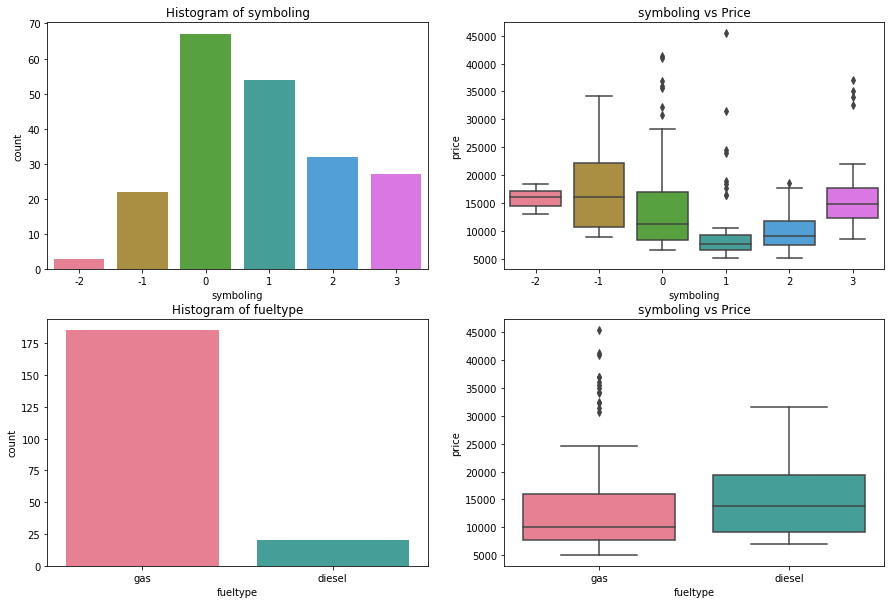

In [17]:
plot_charts('symboling', 'fueltype')

**INFERENCES**
- Most common value for symboling is 0 and 1. The box plot shows us that symboing 1 has the least median price, followed by 0 and 2. symboling values of -1 and -2 have highest median car price. 
- Symboling could be a good predictor variables because we can see a relation in the value of symboling and the price of car.

- More number of cars have fuel type Gas than diesel.
- Disel cars have higher median price than gas, although we can see some outliers in the gas boxplot.

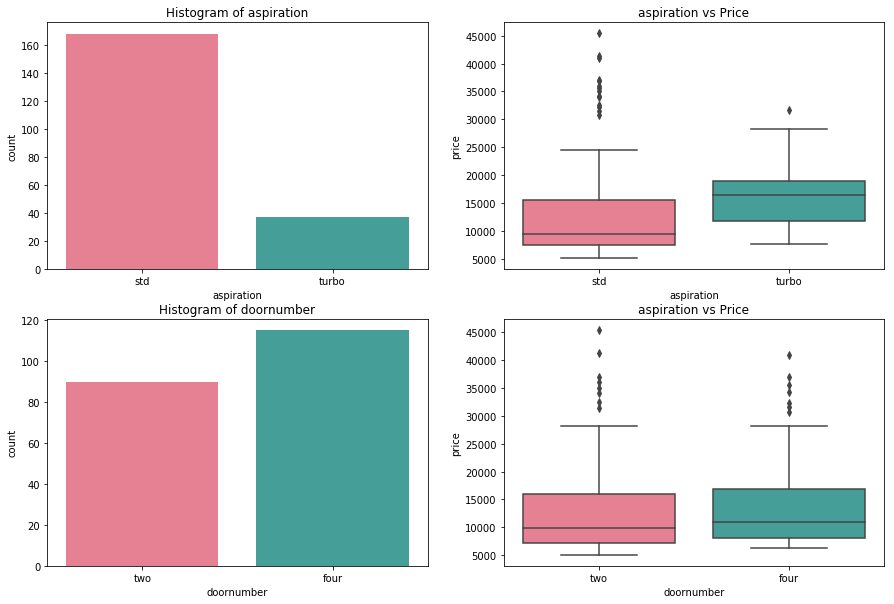

In [18]:
plot_charts('aspiration', 'doornumber')

**INFERENCES**
- Most cars have std aspiration. The box plot shows that cars with turbo aspiration have higher median price
- door number shows no relation to car price and hence seems like an insignificant variable right now.

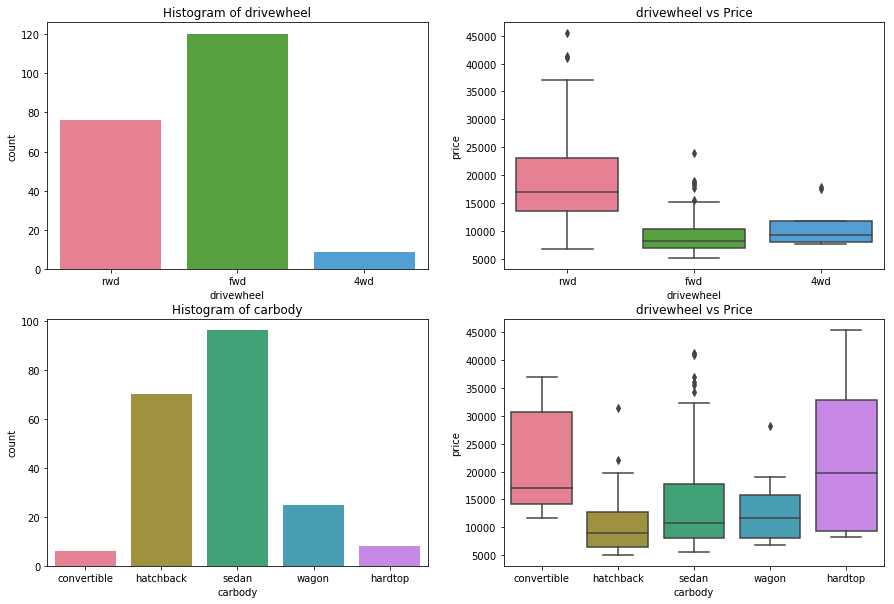

In [19]:
plot_charts('drivewheel', 'carbody')

**INFERENCES**
- Most cars have fwd **(front wheel drive)**, followed by rwd **(reverse wheel drive)**. The 4wd **4 wheel drive** is very uncommon and has the least number of records.
- cars with rwd have higher median price but their are very few records to make any conclusion on this.

- sedan followed by hatchback seem to be the most popular carbody.
- box plot shows that car body convertible and hardtop have higher median values, but very few entries again.

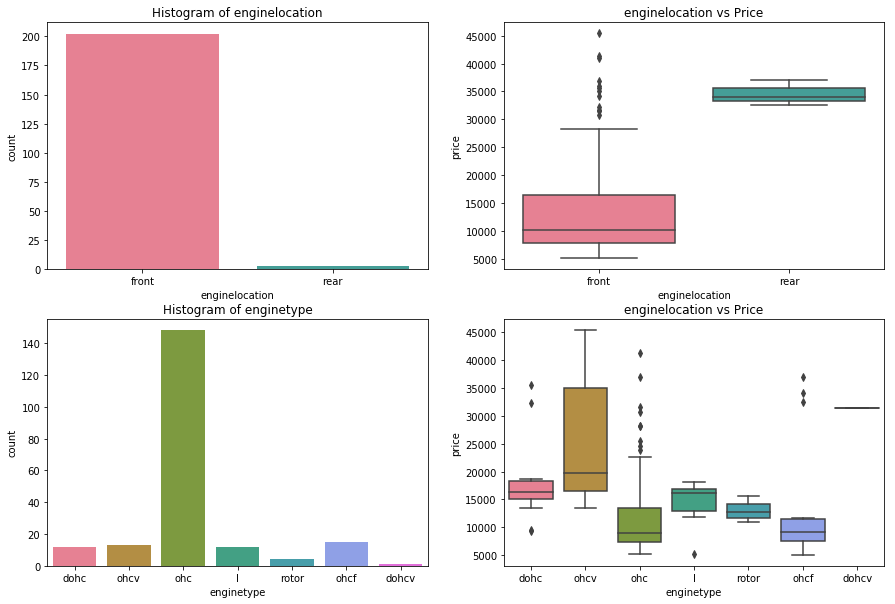

In [20]:
plot_charts('enginelocation', 'enginetype')

**INFERENCES**
- Most cars have engine located at the front and very few cars have engine located at the rear.
- the boxplot shows that when it is at the rear, the median price is higher than the when it is at the front.

- ohc engine is preferred over others.
- ohcv engine has the higherst median value

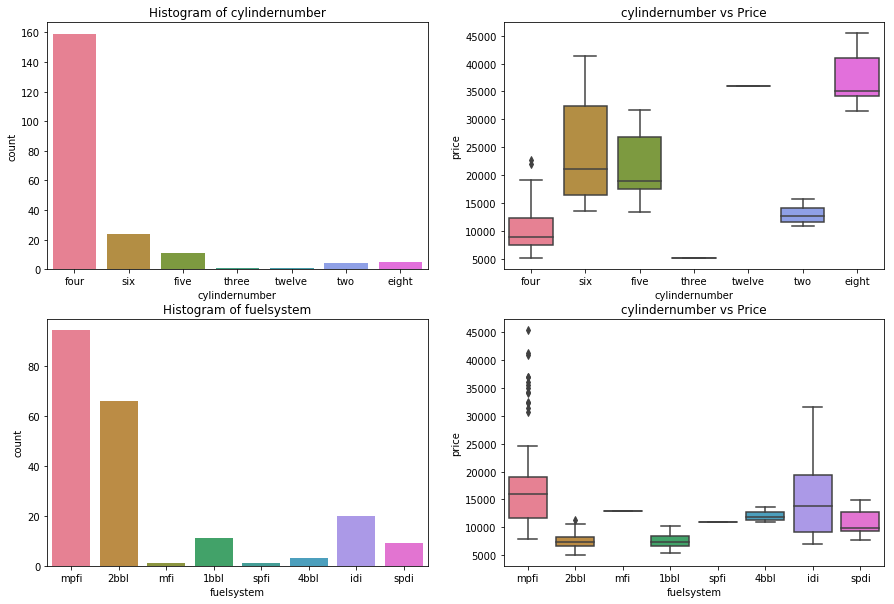

In [21]:
plot_charts('cylindernumber', 'fuelsystem')

**INFERENCES**
- 4 cylinders is the most common number, followed by 4. Cars with four cylinder have the 2nd lowest median value after 3 (very few entries again).

- mpfi is the most occuring fuelsystem. It has the highest median value and also contains outliers.

### Visualizing Numeric Variables


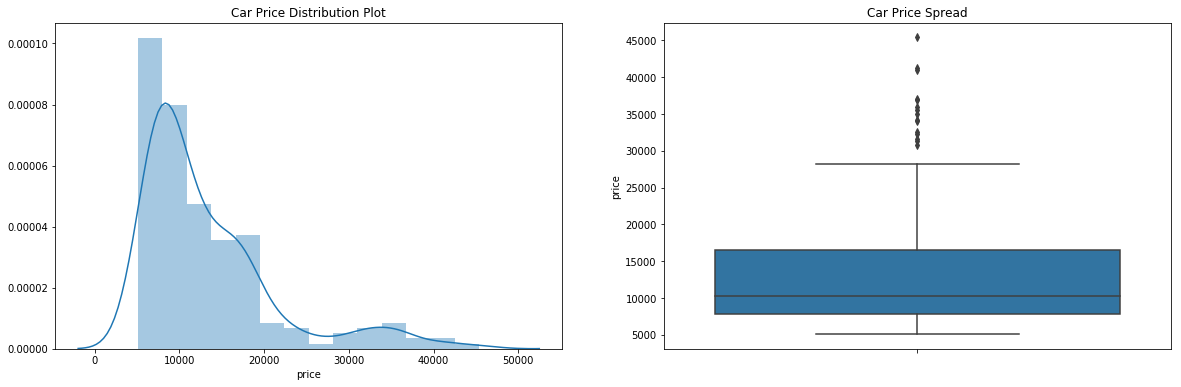

In [22]:
#checking distribution and spread of car price

plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(automobile.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=automobile.price)

plt.show()

#### INFERENCES
- The plot is right-skewed, meaning that the most prices in the dataset are low (Below 15,000).
- There is a significant difference between the mean and the median of the price distribution.
- There is a high variance in the car prices, data points are far spread out from the mean.

In [23]:
# checking numeric columns

automobile.select_dtypes(include=['float64','int64']).columns

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

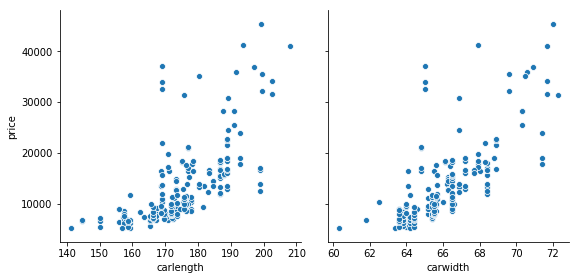

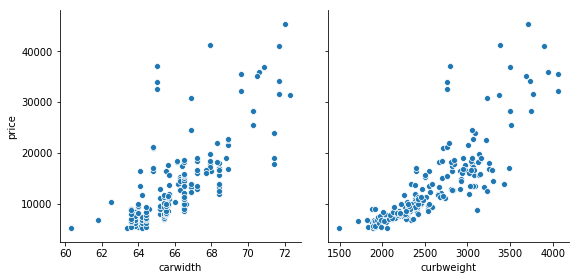

In [24]:
#function to plot scatter plot numeric variables with price

def pp(x,y):
    sns.pairplot(automobile, x_vars=[x,y], y_vars='price',height=4, aspect=1, kind='scatter')
    plt.show()

pp('carlength', 'carwidth')
pp('carwidth', 'curbweight')

#### INFERENCE
- Except Car Height, all variables show a positive correlation with respect to price.

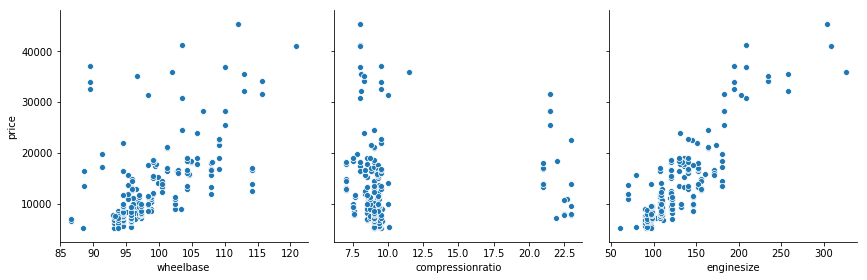

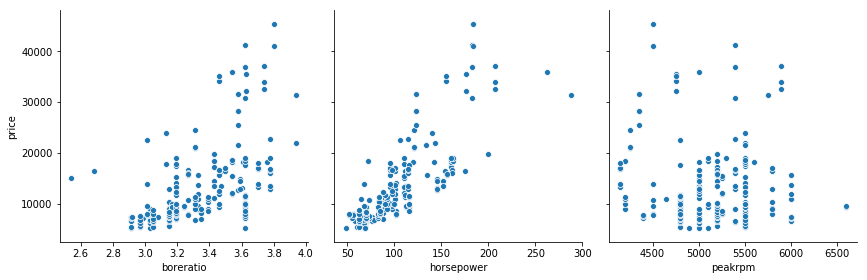

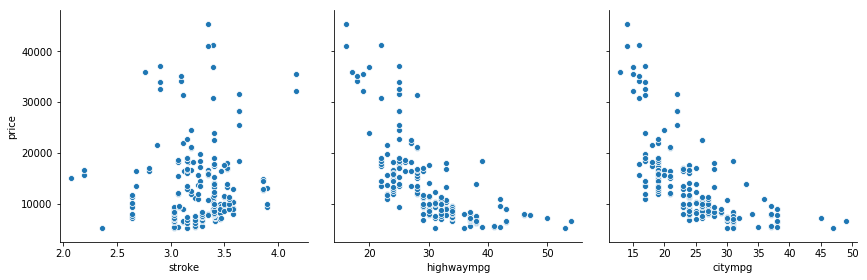

In [25]:
#function to plot scatter plot numeric variables with price

def pp(x,y,z):
    sns.pairplot(automobile, x_vars=[x,y,z], y_vars='price',height=4, aspect=1, kind='scatter')
    plt.show()

pp('wheelbase', 'compressionratio', 'enginesize')
pp('boreratio', 'horsepower', 'peakrpm')
pp('stroke', 'highwaympg', 'citympg')

#### INFERENCES
- Compression Ratio, Stoke and Peakrpm show no obvious correlation b/w them and car price.
- Boreratio shows some positive correlation with a lot of variance.
- Citympg and highwaympg are negatively correlated to the price.

In [26]:
#converting cylinder number to numeric and replacing values

def replace_values(a,b):
    automobile.cylindernumber.replace(a,b,inplace=True)

replace_values('four','4')
replace_values('six','6')
replace_values('five','5')
replace_values('three','3')
replace_values('twelve','12')
replace_values('two','2')
replace_values('eight','8')

automobile.cylindernumber=automobile.cylindernumber.astype('int')

In [27]:
automobile.symboling.unique()

array([ 3,  1,  2,  0, -1, -2])

In [28]:
#converting symboling to categorical because the numeric values imply weight

def replace_values(a,b):
    automobile.symboling.replace(a,b,inplace=True)

replace_values(3,'Very_Risky')
replace_values(2,'Moderately_Risky')
replace_values(1,'Neutral')
replace_values(0,'Safe')
replace_values(-1,'Moderately_Safe')
replace_values(-2,'Very_Safe')

In [29]:
# Converting variables with 2 values to 1 and 0

automobile['fueltype'] = automobile['fueltype'].map({'gas': 1, 'diesel': 0})
automobile['aspiration'] = automobile['aspiration'].map({'std': 1, 'turbo': 0})
automobile['doornumber'] = automobile['doornumber'].map({'two': 1, 'four': 0})
automobile['enginelocation'] = automobile['enginelocation'].map({'front': 1, 'rear': 0})

In [30]:
#dropping card_Id because it has all unique values

automobile.drop(['car_ID'], axis =1, inplace = True)

In [31]:
#numeric variables

num_vars=automobile.select_dtypes(include=['float64','int64']).columns

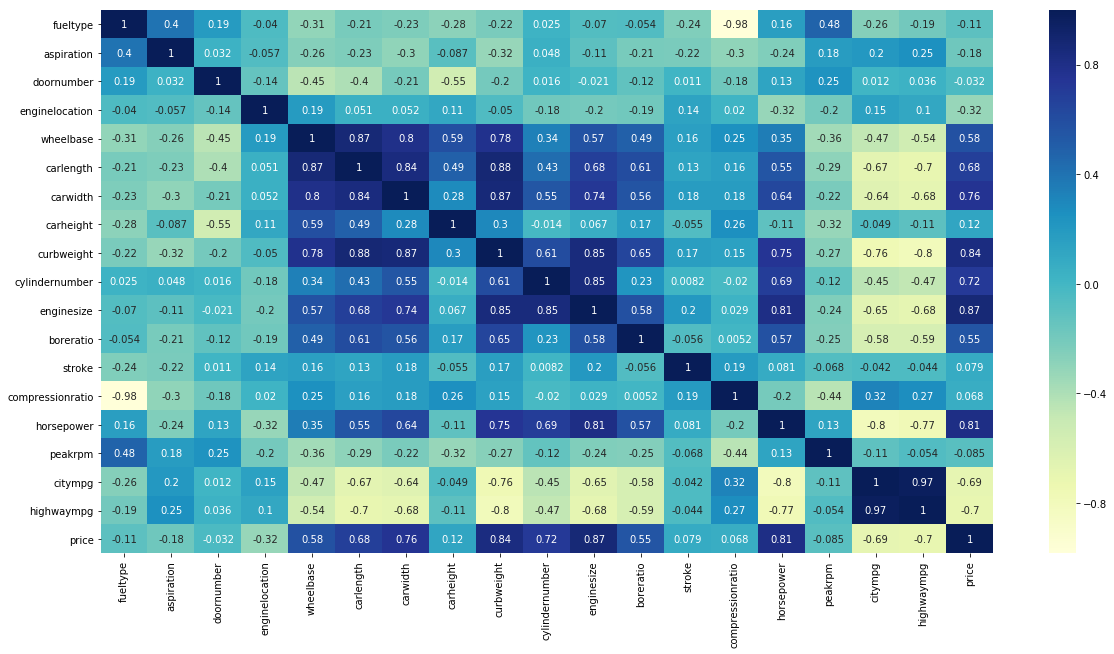

In [32]:
# plotting heatmap to check correlation amongst variables

plt.figure(figsize = (20,10))  
sns.heatmap(automobile[num_vars].corr(),cmap="YlGnBu",annot = True)

In [33]:
#dropping variables which are highly correlated to other variables

automobile.drop(['compressionratio','carwidth','curbweight','wheelbase','citympg'], axis =1, inplace = True)

In [34]:
automobile.head()

,symboling,segment,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carlength,carheight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,horsepower,peakrpm,highwaympg,price
0,Very_Risky,Medium,1,1,1,convertible,rwd,1,168.8,48.8,dohc,4,130,mpfi,3.47,2.68,111,5000,27,13495.0
1,Very_Risky,Medium,1,1,1,convertible,rwd,1,168.8,48.8,dohc,4,130,mpfi,3.47,2.68,111,5000,27,16500.0
2,Neutral,Medium,1,1,1,hatchback,rwd,1,171.2,52.4,ohcv,6,152,mpfi,2.68,3.47,154,5000,26,16500.0
3,Moderately_Risky,Medium,1,1,0,sedan,fwd,1,176.6,54.3,ohc,4,109,mpfi,3.19,3.40,102,5500,30,13950.0
4,Moderately_Risky,Medium,1,1,0,sedan,4wd,1,176.6,54.3,ohc,5,136,mpfi,3.19,3.40,115,5500,22,17450.0


In [35]:
#getting dummies for categorical variables

df = pd.get_dummies(automobile)
df.head()

,fueltype,aspiration,doornumber,enginelocation,carlength,carheight,cylindernumber,enginesize,boreratio,stroke,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,1,1,1,168.8,48.8,4,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,1,1,1,1,168.8,48.8,4,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,1,1,1,1,171.2,52.4,6,152,2.68,3.47,...,1,0,0,0,0,0,0,1,0,0
3,1,1,0,1,176.6,54.3,4,109,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
4,1,1,0,1,176.6,54.3,5,136,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0


In [36]:
#checking column names for dummy variables

df.columns

Index(['fueltype', 'aspiration', 'doornumber', 'enginelocation', 'carlength',
       'carheight', 'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'horsepower', 'peakrpm', 'highwaympg', 'price',
       'symboling_Moderately_Risky', 'symboling_Moderately_Safe',
       'symboling_Neutral', 'symboling_Safe', 'symboling_Very_Risky',
       'symboling_Very_Safe', 'segment_Budget', 'segment_High_End',
       'segment_Low_End', 'segment_Medium', 'carbody_convertible',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginetype_dohc', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'fuelsystem_1bbl', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi'],
      dtype='object')

### DIVIDING INTO TRAIN AND TEST

In [37]:
# importing necessary libraries and functions

from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

### SCALING NUMERIC VARIABLES

In [38]:
# for scaling

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [39]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ['fueltype', 'aspiration', 'doornumber', 'enginelocation', 'enginesize','horsepower', 
            'peakrpm', 'highwaympg', 'carlength', 'carheight', 'boreratio', 'stroke', 'price']


df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,fueltype,aspiration,doornumber,enginelocation,carlength,carheight,cylindernumber,enginesize,boreratio,stroke,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
122,1.0,1.0,0.0,1.0,0.426016,0.265487,4,0.139623,0.230159,0.525253,...,0,0,0,1,0,0,0,0,0,0
125,1.0,1.0,1.0,1.0,0.452033,0.212389,4,0.339623,1.000000,0.464646,...,0,0,0,0,0,0,0,1,0,0
166,1.0,1.0,1.0,1.0,0.448780,0.424779,4,0.139623,0.444444,0.449495,...,0,0,0,0,0,0,0,1,0,0
1,1.0,1.0,1.0,1.0,0.450407,0.088496,4,0.260377,0.626984,0.247475,...,0,0,0,0,0,0,0,1,0,0
199,1.0,0.0,0.0,1.0,0.775610,0.858407,4,0.260377,0.746032,0.484848,...,0,0,0,0,0,0,0,1,0,0


### Dividing into X and Y sets for the Model Building

In [40]:
#dividing into x and y sets where y has the variable we have to predict

y_train = df_train.pop('price')
X_train = df_train

In [41]:
# Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [42]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [43]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('fueltype', False, 29),
 ('aspiration', True, 1),
 ('doornumber', False, 22),
 ('enginelocation', True, 1),
 ('carlength', True, 1),
 ('carheight', False, 13),
 ('cylindernumber', False, 10),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', False, 8),
 ('horsepower', True, 1),
 ('peakrpm', False, 5),
 ('highwaympg', False, 2),
 ('symboling_Moderately_Risky', False, 25),
 ('symboling_Moderately_Safe', False, 16),
 ('symboling_Neutral', False, 27),
 ('symboling_Safe', False, 26),
 ('symboling_Very_Risky', False, 24),
 ('symboling_Very_Safe', False, 6),
 ('segment_Budget', False, 3),
 ('segment_High_End', True, 1),
 ('segment_Low_End', False, 4),
 ('segment_Medium', False, 33),
 ('carbody_convertible', True, 1),
 ('carbody_hardtop', False, 19),
 ('carbody_hatchback', False, 23),
 ('carbody_sedan', False, 20),
 ('carbody_wagon', False, 17),
 ('drivewheel_4wd', False, 34),
 ('drivewheel_fwd', False, 15),
 ('drivewheel_rwd', False, 21),
 ('enginetype_dohc', False, 11),
 ('eng

In [44]:
#checking RFE columns
col = X_train.columns[rfe.support_]
col

Index(['aspiration', 'enginelocation', 'carlength', 'enginesize', 'boreratio',
       'horsepower', 'segment_High_End', 'carbody_convertible',
       'enginetype_rotor', 'fuelsystem_spdi'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [45]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [46]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [47]:
#function for checking VIF

def checkVIF(X):
    vif = pd.DataFrame()
    vif['variable'] = X.columns    
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [48]:
# building MODEL #1

lm = sm.OLS(y_train,X_train_rfe).fit() # fitting the model
print(lm.summary()) # model summary

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     167.3
Date:                Tue, 13 Aug 2019   Prob (F-statistic):           7.38e-70
Time:                        13:10:04   Log-Likelihood:                 203.94
No. Observations:                 143   AIC:                            -385.9
Df Residuals:                     132   BIC:                            -353.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1915    

In [49]:
#dropping constant to calculate VIF

X_train_rfe.drop('const', axis = 1, inplace=True)

In [50]:
#checking VIF

checkVIF(X_train_rfe)

,variable,VIF
3,enginesize,25.34
2,carlength,22.51
1,enginelocation,20.55
4,boreratio,11.74
5,horsepower,11.41
0,aspiration,7.39
6,segment_High_End,2.35
9,fuelsystem_spdi,1.40
8,enginetype_rotor,1.37
7,carbody_convertible,1.10


In [51]:
#dopping boreratio because it has the highest p-value and also high VIF. It is also something which is difficult to explain to management

X_train_new = X_train_rfe.drop(["boreratio"], axis = 1)

In [52]:
#building MODEL #2 after dropping boreratio

X_train_new = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit() # fitting the model
print(lm.summary()) # model summary

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     176.2
Date:                Tue, 13 Aug 2019   Prob (F-statistic):           2.20e-69
Time:                        13:10:04   Log-Likelihood:                 199.91
No. Observations:                 143   AIC:                            -379.8
Df Residuals:                     133   BIC:                            -350.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1483    

In [53]:
#dropping constant to calculate VIF

X_train_new.drop('const', axis=1, inplace=True)

In [54]:
#checking VIF

checkVIF(X_train_new)

,variable,VIF
3,enginesize,25.33
1,enginelocation,19.63
2,carlength,18.92
4,horsepower,11.11
0,aspiration,7.39
5,segment_High_End,2.34
8,fuelsystem_spdi,1.40
7,enginetype_rotor,1.37
6,carbody_convertible,1.09


In [55]:
#dopping enginelocation because it has the highest p-value and also high VIF. it has very few values for rear as we saw earlier

X_train_new.drop(["enginelocation"], axis=1, inplace=True)

In [56]:
#building MODEL #3 after dropping enginelocation

X_train_new = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit() # fitting the model
print(lm.summary()) # model summary

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     188.3
Date:                Tue, 13 Aug 2019   Prob (F-statistic):           5.53e-69
Time:                        13:10:04   Log-Likelihood:                 196.05
No. Observations:                 143   AIC:                            -374.1
Df Residuals:                     134   BIC:                            -347.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0284    

In [57]:
#dropping constant to calculate VIF

X_train_new.drop('const', axis=1, inplace=True)

In [58]:
#checking VIF

checkVIF(X_train_new)

,variable,VIF
2,enginesize,25.01
1,carlength,11.10
3,horsepower,11.03
0,aspiration,3.25
4,segment_High_End,2.25
6,enginetype_rotor,1.37
7,fuelsystem_spdi,1.15
5,carbody_convertible,1.08


In [59]:
#dopping horsepower because it has the high VIF and exhibits multicollinearity. 
#it is highly correlated to engine size and can be dropped.

X_train_new.drop(["horsepower"], axis=1, inplace=True)

In [60]:
#building MODEL #4 after dropping horsepower

X_train_new = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit() # fitting the model
print(lm.summary()) # model summary

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     181.0
Date:                Tue, 13 Aug 2019   Prob (F-statistic):           2.32e-65
Time:                        13:10:04   Log-Likelihood:                 184.28
No. Observations:                 143   AIC:                            -352.6
Df Residuals:                     135   BIC:                            -328.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0081    

In [61]:
#dropping constant to calculate VIF

X_train_new.drop('const', axis=1, inplace=True)

In [62]:
#checking VIF

checkVIF(X_train_new)

,variable,VIF
2,enginesize,12.81
1,carlength,11.07
0,aspiration,3.19
3,segment_High_End,2.24
5,enginetype_rotor,1.13
6,fuelsystem_spdi,1.11
4,carbody_convertible,1.08


In [63]:
#dopping carlength because it has the high VIF and exhibits multicollinearity. 
#it is highly correlated to engine size and can be dropped.

X_train_new.drop(["carlength"], axis=1, inplace=True)

In [64]:
#building MODEL #5 after dropping carlength

X_train_new = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit() # fitting the model
print(lm.summary()) # model summary

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     178.0
Date:                Tue, 13 Aug 2019   Prob (F-statistic):           7.44e-62
Time:                        13:10:04   Log-Likelihood:                 172.89
No. Observations:                 143   AIC:                            -331.8
Df Residuals:                     136   BIC:                            -311.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0718    

In [65]:
#dropping constant to calculate VIF

X_train_vif=X_train_new.drop('const', axis=1)

In [66]:
#checking VIF

checkVIF(X_train_vif)

,variable,VIF
1,enginesize,4.18
0,aspiration,2.72
2,segment_High_End,1.94
5,fuelsystem_spdi,1.11
4,enginetype_rotor,1.07
3,carbody_convertible,1.05


## Residual Analysis of the train data


In [67]:
#calculating price on train set using the model built

y_train_price = lm.predict(X_train_new)

Text(0.5, 0, 'Errors')

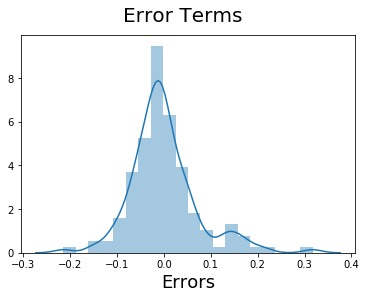

In [68]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Error Terms are normally distributed with mean 0

Text(0, 0.5, 'y_train_price')

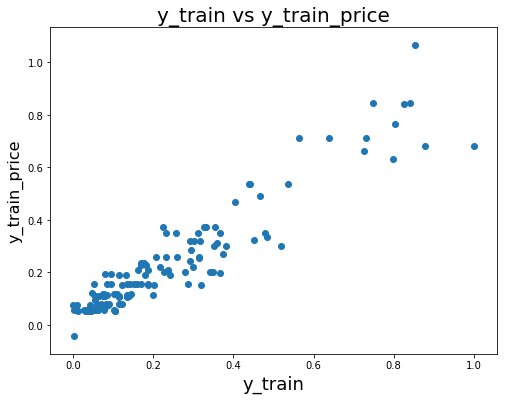

In [69]:
# Plotting y_train and y_train_price to understand the residuals.

plt.figure(figsize = (8,6))
plt.scatter(y_train,y_train_price)
plt.title('y_train vs y_train_price', fontsize=20)              # Plot heading 
plt.xlabel('y_train', fontsize=18)                          # X-label
plt.ylabel('y_train_price', fontsize=16)                          # Y-label

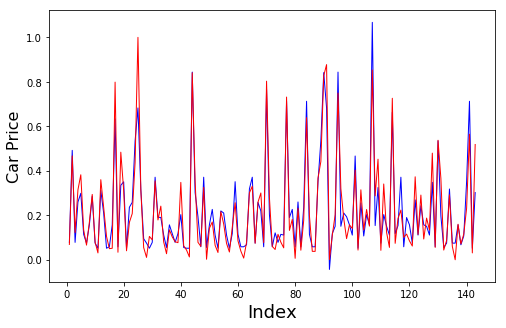

In [70]:
# Actual vs Predicted for TRAIN SET

plt.figure(figsize = (8,5))
c = [i for i in range(1,144,1)]
d = [i for i in range(1,144,1)]
plt.plot(c, y_train_price, color="blue", linewidth=1, linestyle="-")     #Plotting Actual
plt.plot(d, y_train, color="red",  linewidth=1, linestyle="-")  #Plotting predicted
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Car Price', fontsize=16)  
plt.show()

Text(0, 0.5, 'ytest-ypred')

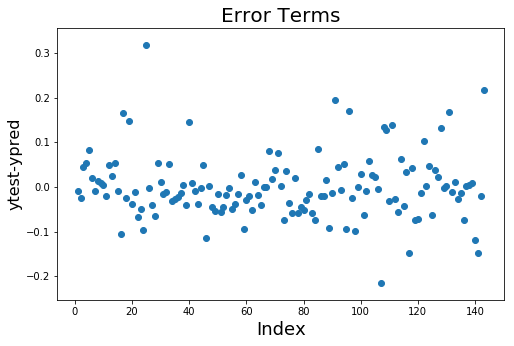

In [71]:
# Error terms for TRAIN SET
plt.figure(figsize = (8,5))
c = [i for i in range(1,144,1)]
plt.scatter(c,y_train-y_train_price)

plt.title('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

## Making Predictions

In [72]:
# Applying the scaling on the test sets

num_vars = ['fueltype', 'aspiration', 'doornumber', 'enginelocation', 'enginesize','horsepower', 
            'peakrpm', 'highwaympg', 'carlength', 'carheight', 'boreratio', 'stroke', 'price']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [73]:
# Dividing into X_test and y_test

y_test = df_test.pop('price')
X_test = df_test

In [74]:
X_train_new.drop('const', axis=1, inplace=True)

In [75]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [76]:
# Making predictions
y_pred = lm.predict(X_test_new)

In [77]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8772766234421762

## Model Evaluation

Text(0, 0.5, 'y_pred')

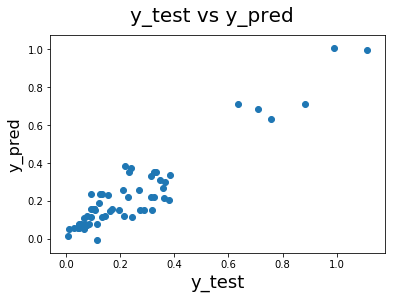

In [78]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

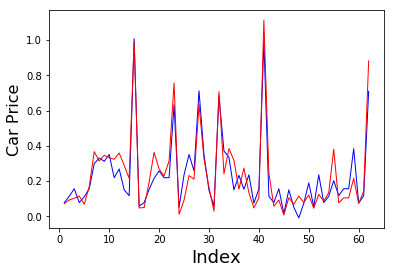

In [79]:
# Actual vs Predicted
c = [i for i in range(1,63,1)]
d = [i for i in range(1,63,1)]
plt.plot(c, y_pred, color="blue", linewidth=1, linestyle="-")     #Plotting Actual
plt.plot(d, y_test, color="red",  linewidth=1, linestyle="-")  #Plotting predicted
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Car Price', fontsize=16)  
plt.show()

Text(0, 0.5, 'ytest-ypred')

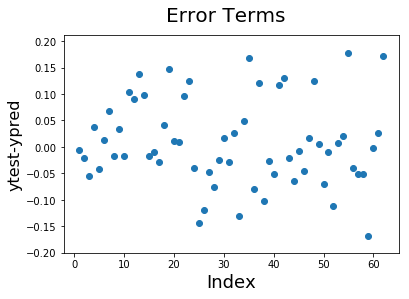

In [80]:
# Error terms

fig = plt.figure()
c = [i for i in range(1,63,1)]
plt.scatter(c,y_test-y_pred)

fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

In [81]:
#RMSE score for test set

import numpy as np
from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE : 0.0809898009410232


In [82]:
#RMSE score for train set

import numpy as np
from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_train, y_train_price)))

RMSE : 0.07222658461747392


In [83]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8772766234421762

In [84]:
r2_score(y_train, y_train_price)

0.8870686436956071